# TensorFlow Notebook (Deep learning fundamentals)

<img src="https://raw.githubusercontent.com/arad1367/UniLi_sources/main/IMG/logo.jpg"
     alt="University of Liechtenstein"
     width="350"
     height="auto">

### About This Tutorial

This tutorial is prepared by **Dr. Pejman Ebrahimi** for the "Deep Learning and Advanced AI Techniques" course at the University of Liechtenstein.

For more resources and notebooks related to this course, please visit Moodle or GitHub repository: [Course Materials](https://github.com/arad1367/University-of-Liechtenstein/tree/main/Deep%20Learning%20and%20Advanced%20AI).

You can reach out to Dr. Pejman Ebrahimi via email: [pejman.ebrahimi@uni.li](mailto:pejman.ebrahimi@uni.li).

# Table of Contents

## Introduction to Deep Learning

- [What is Deep Learning?](#1.1-What-is-Deep-Learning?)
- [TensorFlow Framework](#1.2-TensorFlow-Framework)

## Understanding Tensors

- [What is a Tensor?](#2.1-What-is-a-Tensor?)
- [Creating Tensors](#2.2-Creating-Tensors)
- [Manipulating Tensors](#2.3-Manipulating-Tensors)

## Regression Case Study: Lettuce Growth Prediction

- [Data Exploration](#3.1-Data-Exploration)
- [Data Preprocessing](#3.2-Data-Preprocessing)
- [Model Development](#3.3-Model-Development)
- [Model Training](#3.4-Model-Training)
- [Model Evaluation](#3.5-Model-Evaluation)
- [Making Predictions](#3.6-Making-Predictions)

## Visualizing and Understanding Models

- [Model Summary](#4.1-Model-Summary)
- [Model Architecture Visualization](#4.2-Model-Architecture-Visualization)
- [Learning Curves](#4.3-Learning-Curves)

## Next Steps and Practice Exercises


### Setup and Dependencies

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from tensorflow.keras.utils import plot_model

# Check TensorFlow version
print(f'The TensorFlow version in use is: {tf.__version__}')

The TensorFlow version in use is: 2.18.0


## 1. Introduction to Deep Learning

### 1.1 What is Deep Learning?

Deep Learning is a subset of machine learning that uses neural networks with multiple layers (deep neural networks) to analyze various forms of data. Unlike traditional machine learning algorithms, deep learning can automatically discover the representations needed for feature detection or classification from raw data.

**Key characteristics of deep learning:**

- **Hierarchical feature learning:** Lower layers learn basic features, while higher layers combine these to form more abstract concepts.
- **End-to-end learning:** The model learns all steps from raw input to final output.
- **Requires more data:** Generally performs better with larger datasets compared to traditional ML.
- **Computationally intensive:** Often requires specialized hardware (GPUs/TPUs) for efficient training.

Deep learning has revolutionized fields like computer vision, natural language processing, speech recognition, and many other domains where complex pattern recognition is crucial.

### 1.2 TensorFlow Framework

TensorFlow is an open-source machine learning framework developed by Google that specializes in deep learning applications. It provides a comprehensive ecosystem of tools, libraries, and community resources that help researchers and developers build and deploy ML-powered applications.

**Key features of TensorFlow:**

- **Flexible architecture:** Works across different platforms (CPU, GPU, TPU, mobile devices).
- **Production-ready:** Seamless transition from research to production.
- **Keras integration:** High-level API for building and training models.
- **Eager execution:** Imperative programming environment for research and experimentation.
- **TensorBoard:** Visualization toolkit for model training metrics.

In this notebook, we'll use TensorFlow with the Keras API to build, train, and evaluate a deep learning model.


## 2. Understanding Tensors

### 2.1 What is a Tensor?

A tensor is the fundamental data structure in TensorFlow. It's a mathematical object representing a multi-dimensional array of numerical values. Tensors can be thought of as generalizations of vectors and matrices to higher dimensions.

The **rank** (or dimensionality) of a tensor refers to the number of dimensions in the tensor:

- **Rank 0:** Scalar (single number)
- **Rank 1:** Vector (1D array)
- **Rank 2:** Matrix (2D array)
- **Rank 3+:** Higher-dimensional tensors

Tensors have three key attributes:

- **Rank:** Number of dimensions
- **Shape:** Number of elements along each dimension
- **Data type:** Type of data contained in the tensor (e.g., `float32`, `int32`)

### 2.2 Creating Tensors

There are multiple ways to create tensors in TensorFlow


In [2]:
# Create a 2D tensor (matrix)
array_2D = tf.constant([
    [1, 3],
    [10, 10]
], dtype=tf.float32)

print("2D Tensor:")
print(array_2D)
print(f"Dimensionality (rank): {array_2D.ndim}")
print(f"Shape: {array_2D.shape}")
print(f"Data type: {array_2D.dtype}")
print()

# Create a 3D tensor
array_3D = tf.constant([[
    [1, 1, 2, 3],
    [4, 4, 5, 7]
]], dtype=tf.float32)

print("3D Tensor:")
print(array_3D)
print(f"Dimensionality (rank): {array_3D.ndim}")
print(f"Shape: {array_3D.shape}")
print()

# Create a random tensor from a normal distribution
random_tensor = tf.random.normal(shape=(5, 5), dtype=tf.float32)
print("Random tensor (samples from normal distribution):")
print(random_tensor)

2D Tensor:
tf.Tensor(
[[ 1.  3.]
 [10. 10.]], shape=(2, 2), dtype=float32)
Dimensionality (rank): 2
Shape: (2, 2)
Data type: <dtype: 'float32'>

3D Tensor:
tf.Tensor(
[[[1. 1. 2. 3.]
  [4. 4. 5. 7.]]], shape=(1, 2, 4), dtype=float32)
Dimensionality (rank): 3
Shape: (1, 2, 4)

Random tensor (samples from normal distribution):
tf.Tensor(
[[-1.3096877   0.43449727  0.19134928 -1.5709703   0.13273843]
 [ 1.7840627   0.10713392 -0.00313574 -2.2044573   0.1999521 ]
 [-0.47034034 -0.52953845 -0.892631    0.49015754  0.15227868]
 [ 1.0907295  -0.85898376 -1.062902    0.34142524  1.0337092 ]
 [ 0.97197074  0.45319816 -0.03939953  2.8215168  -1.5518712 ]], shape=(5, 5), dtype=float32)


### 2.3 Manipulating Tensors

Tensors can be transformed and manipulated in various ways


In [3]:
# Create a sequence tensor
sequence_tensor = tf.constant(np.arange(1, 100, 10), dtype=tf.float32)
print(f"Original sequence tensor: {sequence_tensor}")

# Shuffle a tensor
shuffled_tensor = tf.random.shuffle(sequence_tensor)
print(f"Shuffled tensor: {shuffled_tensor}")

# Convert NumPy array to tensor
simple_array = np.linspace(1, 100, 50)
converted_tensor = tf.convert_to_tensor(simple_array)
print("Converted tensor from NumPy array:")
print(converted_tensor)
print(f"Shape: {converted_tensor.shape}, Type: {converted_tensor.dtype}")

# Basic tensor operations
a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])

# Addition
print(f"Addition: {a + b}")

# Multiplication (element-wise)
print(f"Element-wise multiplication: {a * b}")

# Matrix multiplication
matrix_a = tf.reshape(a, [1, 3])
matrix_b = tf.reshape(b, [3, 1])
print(f"Matrix multiplication result shape: {tf.matmul(matrix_a, matrix_b).shape}")

Original sequence tensor: [ 1. 11. 21. 31. 41. 51. 61. 71. 81. 91.]
Shuffled tensor: [41. 71. 51. 11. 81. 91. 61. 21. 31.  1.]
Converted tensor from NumPy array:
tf.Tensor(
[  1.           3.02040816   5.04081633   7.06122449   9.08163265
  11.10204082  13.12244898  15.14285714  17.16326531  19.18367347
  21.20408163  23.2244898   25.24489796  27.26530612  29.28571429
  31.30612245  33.32653061  35.34693878  37.36734694  39.3877551
  41.40816327  43.42857143  45.44897959  47.46938776  49.48979592
  51.51020408  53.53061224  55.55102041  57.57142857  59.59183673
  61.6122449   63.63265306  65.65306122  67.67346939  69.69387755
  71.71428571  73.73469388  75.75510204  77.7755102   79.79591837
  81.81632653  83.83673469  85.85714286  87.87755102  89.89795918
  91.91836735  93.93877551  95.95918367  97.97959184 100.        ], shape=(50,), dtype=float64)
Shape: (50,), Type: <dtype: 'float64'>
Addition: [5 7 9]
Element-wise multiplication: [ 4 10 18]
Matrix multiplication result shape: (1, 1

## 3. Regression Case Study: Lettuce Growth Prediction

In this section, we'll apply deep learning to predict the growth days of lettuce plants based on environmental factors.


### 3.1 Data Exploration

First, let's load and explore the dataset.


In [4]:
# Load the dataset
data_path = 'https://raw.githubusercontent.com/arad1367/WAC_November-2023/main/lettuce.csv'
df = pd.read_csv(data_path, encoding='unicode_escape')

# Display the first few rows
print("First 6 rows of the dataset:")
display(df.head(6))

# Display the last few rows
print("\nLast few rows of the dataset:")
display(df.tail())

# Get information about the dataset
print("\nDataset information:")
df.info()

# Get statistical summary of the dataset
print("\nStatistical summary:")
display(df.describe())

First 6 rows of the dataset:


,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,33.4,53,582,6.4,1
1,1,33.5,53,451,6.1,2
2,1,33.4,59,678,6.4,3
3,1,33.4,68,420,6.4,4
4,1,33.4,74,637,6.5,5
5,1,32.3,77,478,6.8,6



Last few rows of the dataset:


,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
3164,70,19.4,72,475,6.1,42
3165,70,22.5,80,668,6.7,43
3166,70,22.5,62,476,6.6,44
3167,70,24.6,79,621,6.0,45
3168,70,22.6,69,521,6.5,46



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Temperature (°C)  3169 non-null   float64
 2   Humidity (%)      3169 non-null   int64  
 3   TDS Value (ppm)   3169 non-null   int64  
 4   pH Level          3169 non-null   float64
 5   Growth Days       3169 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 148.7 KB

Statistical summary:


,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


Our dataset contains information about lettuce plants with the following features:

- **Plant_ID:** Identifier for each plant
- **Temperature (°C):** Temperature measurement
- **Humidity (%):** Humidity level
- **TDS Value (ppm):** Total Dissolved Solids, measuring nutrient concentration
- **pH Level:** Acidity/alkalinity level
- **Growth Days:** Target variable - number of days the plant has grown

This is a regression problem where we're trying to predict a continuous value (**Growth Days**) based on environmental factors.


### 3.2 Data Preprocessing

Before building our model, we need to preprocess the data.

In [5]:
# Check for missing values
print("Missing values in each column:")
print(df.isna().sum())

# Split features (X) and target variable (y)
X = df.drop('Growth Days', axis=1)
y = df['Growth Days']

print("\nFeature variables (first 10 rows):")
display(X[:10])

print("\nTarget variable (first 10 values):")
print(y[:10].values)

# Split data into training, validation, and test sets (70%, 15%, 15%)
train_bound = math.ceil(0.7 * len(df))
validation_bound = train_bound + math.ceil(0.15 * len(df))

X_train, y_train = X[:train_bound], y[:train_bound]
X_valid, y_valid = X[train_bound:validation_bound], y[train_bound:validation_bound]
X_test, y_test = X[validation_bound:], y[validation_bound:]

print(f"\nDataset split sizes:")
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_valid)} samples")
print(f"Test set: {len(X_test)} samples")

Missing values in each column:
Plant_ID            0
Temperature (°C)    0
Humidity (%)        0
TDS Value (ppm)     0
pH Level            0
Growth Days         0
dtype: int64

Feature variables (first 10 rows):


,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level
0,1,33.4,53,582,6.4
1,1,33.5,53,451,6.1
2,1,33.4,59,678,6.4
3,1,33.4,68,420,6.4
4,1,33.4,74,637,6.5
5,1,32.3,77,478,6.8
6,1,32.3,75,682,6.0
7,1,22.7,63,576,6.3
8,1,31.9,69,662,6.1
9,1,30.2,59,607,6.2



Target variable (first 10 values):
[ 1  2  3  4  5  6  7  8  9 10]

Dataset split sizes:
Training set: 2219 samples
Validation set: 476 samples
Test set: 474 samples


Let's visualize the relationship between one of our features and the target variable across our dataset splits

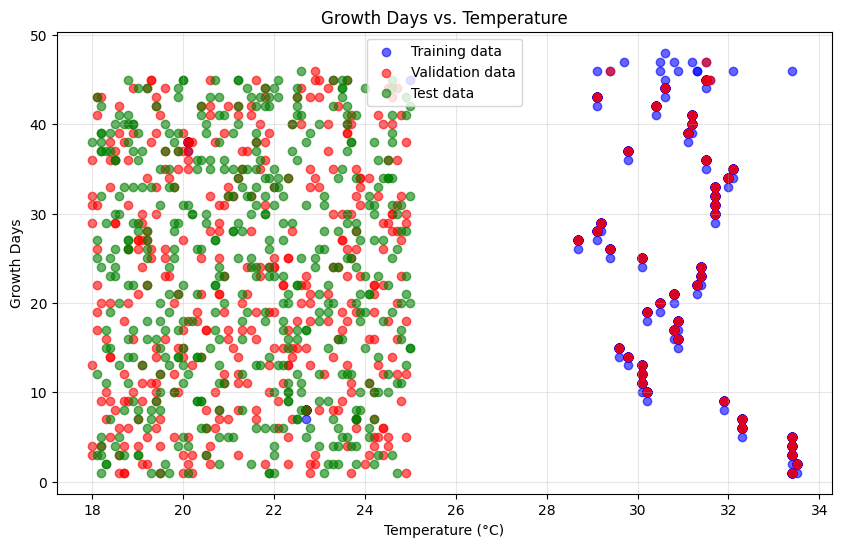

In [6]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train['Temperature (°C)'], y_train, c='b', alpha=0.6, label="Training data")
plt.scatter(X_valid['Temperature (°C)'], y_valid, c='r', alpha=0.6, label="Validation data")
plt.scatter(X_test['Temperature (°C)'], y_test, c='g', alpha=0.6, label="Test data")

plt.title('Growth Days vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Growth Days')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.3 Model Development

Now we'll create a neural network model using TensorFlow's Keras API.


In [7]:
# Create a Sequential model
model = tf.keras.Sequential([
    # Input layer is implicit based on the number of features

    # Hidden layers with ReLU activation
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer1"),
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer2"),
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer3"),

    # Output layer (no activation for regression)
    tf.keras.layers.Dense(1, name="output_layer")
], name="LettucePredictionModel")

# Compile the model with Mean Absolute Error loss
model.compile(
    loss=tf.keras.losses.mae,  # Mean Absolute Error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']  # Track MAE during training
)

### 3.4 Model Training

Let's train our model and track the training history.


In [8]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    verbose=1
)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 28.7335 - mae: 28.7335 - val_loss: 11.7963 - val_mae: 11.7963
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8384 - mae: 11.8384 - val_loss: 11.7466 - val_mae: 11.7466
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9617 - mae: 11.9617 - val_loss: 11.7526 - val_mae: 11.7526
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9558 - mae: 11.9558 - val_loss: 11.7276 - val_mae: 11.7276
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.9020 - mae: 11.9020 - val_loss: 11.7460 - val_mae: 11.7460
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7806 - mae: 11.7806 - val_loss: 11.7616 - val_mae: 11.7616
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7860 - mae: 11.7860 - val_loss: 11.7066 - val_mae: 11.7066
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9394 - mae: 11.9394 - val_loss: 11.8643 - val_mae: 11.8643
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s

### 3.5 Model Evaluation

Now we'll evaluate the model's performance.


In [9]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7815 - mae: 11.7815 
Test Mean Absolute Error: 11.94


### 3.6 Making Predictions

Let's use our model to make predictions on the test set.


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Actual Growth Days,Predicted Growth Days,Absolute Error
0,23,31.700006,8.700006
1,24,27.921034,3.921034
2,25,28.284689,3.284689
3,26,23.704081,2.295919
4,27,28.734201,1.734201
5,28,28.080072,0.080072
6,29,27.203482,1.796518
7,30,24.069342,5.930658
8,31,28.530512,2.469488
9,32,28.339453,3.660547


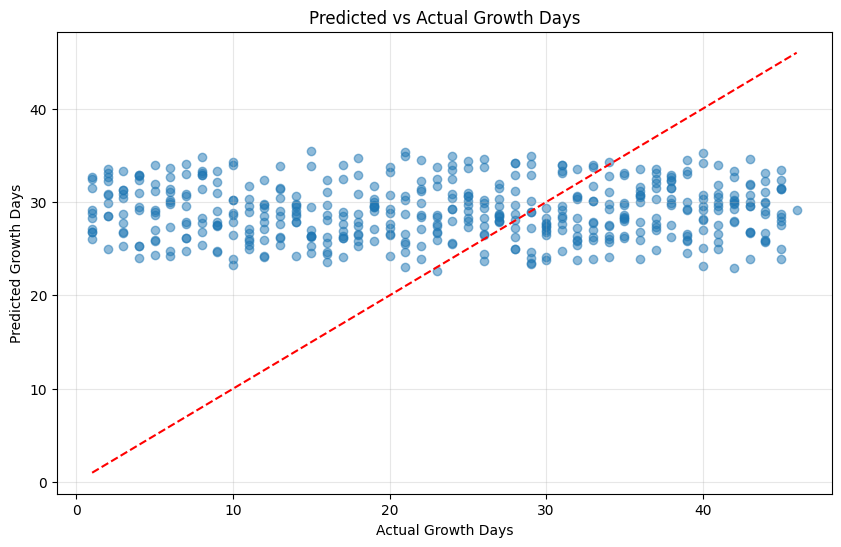

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Display the first 20 predictions vs actual values
comparison_df = pd.DataFrame({
    'Actual Growth Days': y_test[:20].values,
    'Predicted Growth Days': y_pred[:20].flatten()
})
comparison_df['Absolute Error'] = abs(comparison_df['Actual Growth Days'] - comparison_df['Predicted Growth Days'])
display(comparison_df)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Growth Days')
plt.ylabel('Predicted Growth Days')
plt.title('Predicted vs Actual Growth Days')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Visualizing and Understanding Models

### 4.1 Model Summary

The model summary provides information about the layers, parameters, and structure.

In this summary:

Each layer is listed with its type, output shape, and parameter count
The output shape shows the dimensionality of each layer's output
Parameters are the weights and biases that are learned during training
Total parameters indicate the model's complexity and memory requirements


In [11]:
# Display model summary
model.summary()

Model: "LettucePredictionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer1 (Dense)           │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer3 (Dense)           │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 584 (2.29 KB)

### 4.2 Model Architecture Visualization

We can visualize the model architecture using `plot_model`.


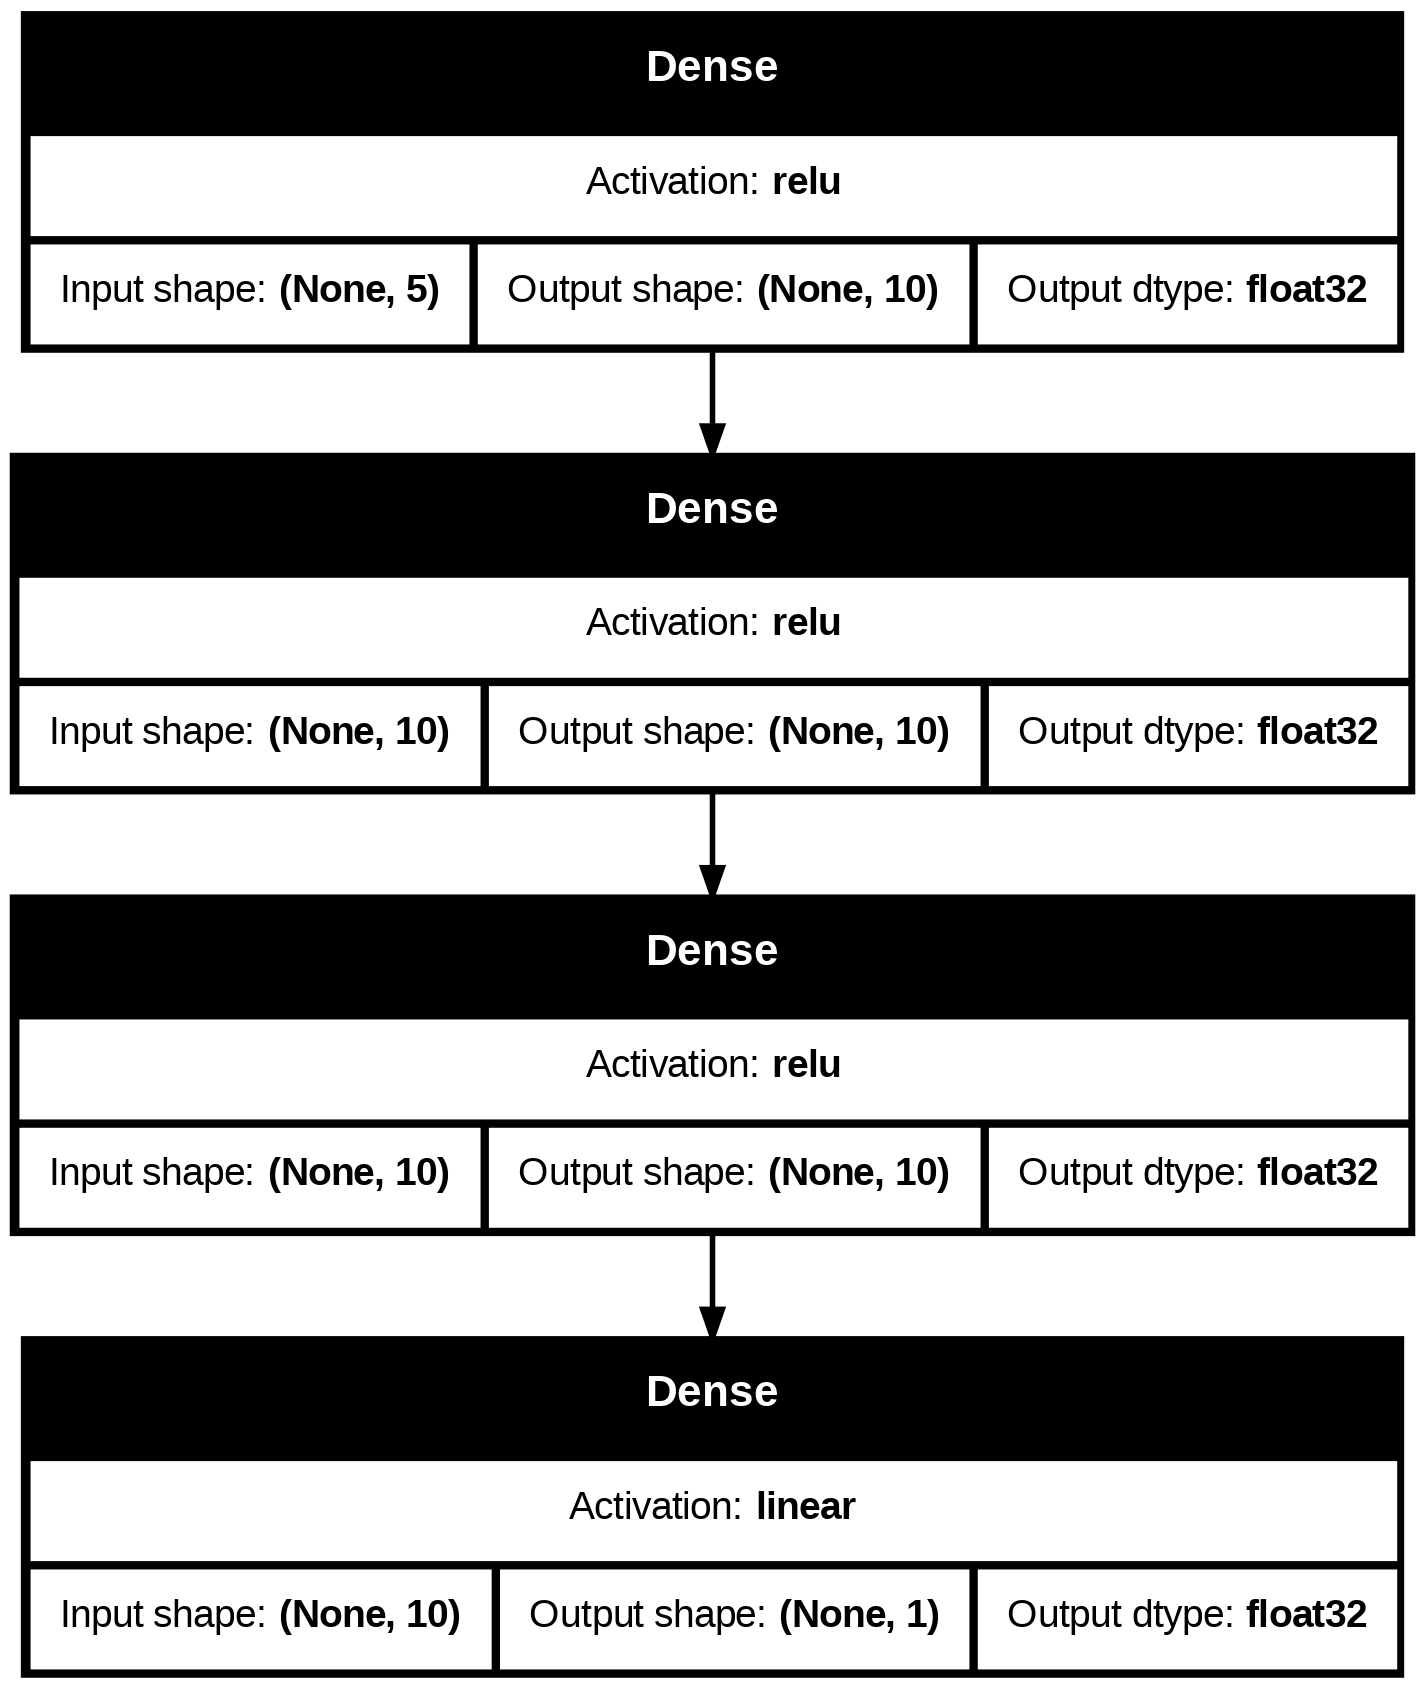

In [12]:
# Visualize model architecture
plot_model(
    model=model,
    show_shapes=True,
    show_layer_activations=True,
    show_dtype=True,
    to_file='lettuce_model_architecture.png'
)

# Display the image
from IPython.display import Image
Image('lettuce_model_architecture.png')

### 4.3 Learning Curves

Learning curves help us understand the training process and identify potential issues.

From these learning curves, we can analyze:

- **Convergence:** Whether the model is still learning or has plateaued.
- **Overfitting:** If training loss continues to decrease while validation loss increases.
- **Underfitting:** If both training and validation loss remain high.
- **Learning rate:** If loss decreases in a stable manner or fluctuates significantly.


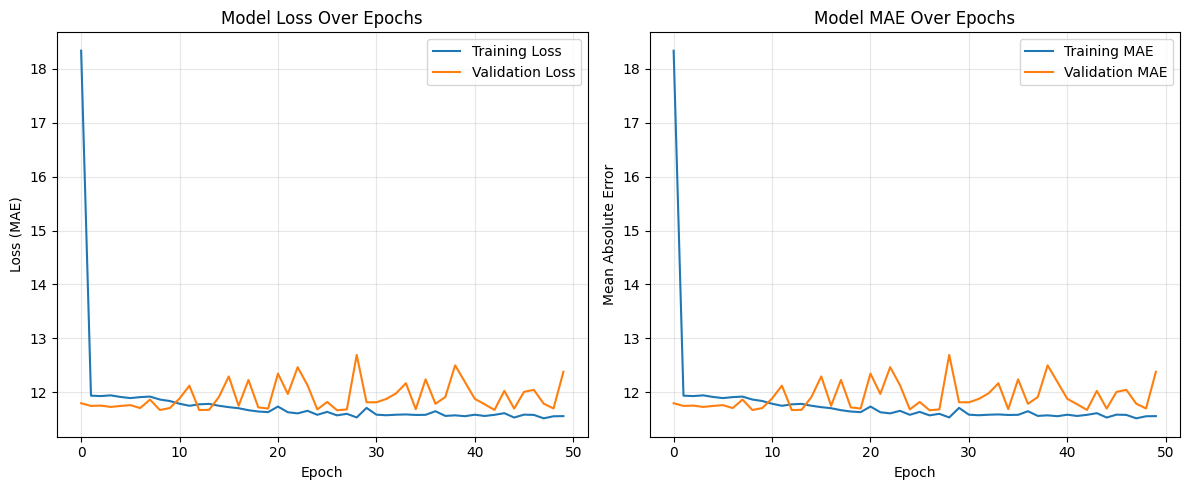

In [13]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Next Steps and Practice Exercises

To deepen your understanding of deep learning with TensorFlow, try these exercises:

### Model Improvement:

- Add more layers or neurons to the model.
- Try different activation functions (e.g., sigmoid, tanh, leaky ReLU).
- Implement dropout for regularization.
- Experiment with different optimizers (SGD, RMSprop, etc.).

### Feature Engineering:

- Create new features based on domain knowledge.
- Normalize or standardize the input features.
- Implement feature crossing for capturing interactions.

### Hyperparameter Tuning:

- Use different batch sizes.
- Try different learning rates.
- Experiment with different layer configurations.

### Model Evaluation:

- Implement K-fold cross-validation.
- Explore different metrics (RMSE, R²).
- Analyze specific samples where the model performs poorly.

### Advanced Techniques:

- Implement early stopping to prevent overfitting.
- Use learning rate scheduling.
- Try different model architectures (Functional API).


## Conclusion

This notebook introduced fundamental concepts in deep learning using TensorFlow:

- Understanding tensors as the basic data structure.
- Building, training, and evaluating a neural network for regression.
- Visualizing and interpreting model performance.
- Exploring techniques to improve model accuracy.

Deep learning is a powerful approach for modeling complex relationships in data, but it requires careful consideration of model architecture, hyperparameters, and evaluation strategies. As you continue to explore this field, remember that experimentation and iteration are key to building effective models.


### Improved Model

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 19.8273 - mae: 19.8273 - val_loss: 11.7341 - val_mae: 11.7341
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5827 - mae: 14.5827 - val_loss: 11.5267 - val_mae: 11.5267
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.2118 - mae: 13.2118 - val_loss: 11.5994 - val_mae: 11.5994
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.0383 - mae: 13.0383 - val_loss: 11.5437 - val_mae: 11.5437
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.0331 - mae: 13.0331 - val_loss: 11.7381 - val_mae: 11.7381
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.9335 - mae: 12.9335 - val_loss: 12.1954 - val_mae: 12.1954
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.7709 - mae: 12.7709 - val_loss: 11.8069 - val_mae: 11.8069
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.3997 - mae: 12.3997 - val_loss: 11.6263 - val_mae: 11.6263
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "ImprovedLettucePredictionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer1 (Dense)           │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer3 (Dense)           │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 584 (2.29 KB)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6111 - mae: 11.6111 
Original Model - Test MAE: 11.94
Improved Model - Test MAE: 11.52


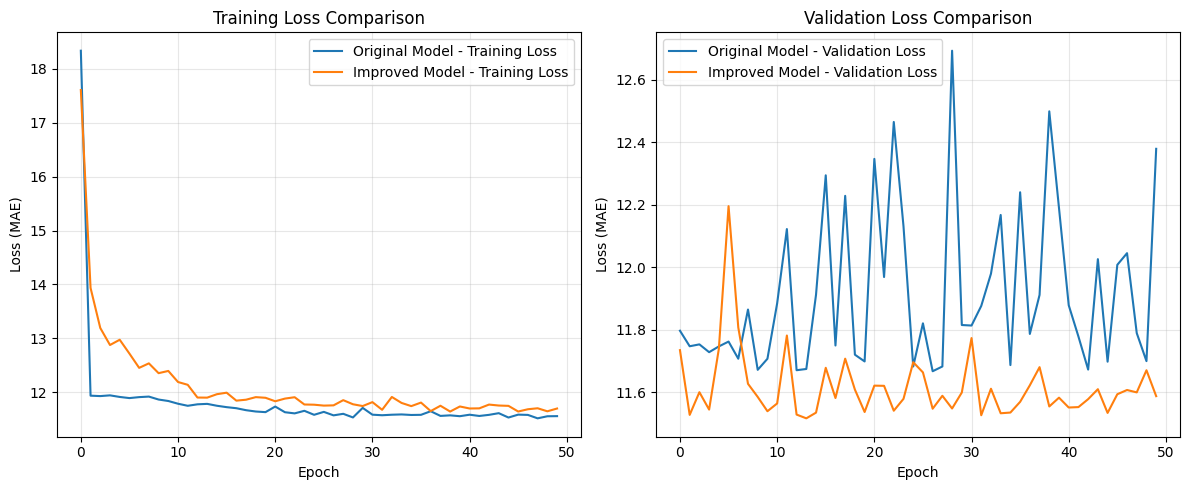

In [14]:
# Create an improved model with LeakyReLU and adjusted learning rate
improved_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="hidden_layer1"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(10, name="hidden_layer2"),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Dense(10, name="hidden_layer3"),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Dense(1, name="output_layer")
], name="ImprovedLettucePredictionModel")

# Compile with adjusted learning rate
improved_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Half the original rate
    metrics=['mae']
)

# Train the improved model
history_improved = improved_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    verbose=1
)

# Display the model summary
improved_model.summary()

# Evaluate the improved model on the test set
test_loss_improved, test_mae_improved = improved_model.evaluate(X_test, y_test)
print(f"Original Model - Test MAE: {test_mae:.2f}")
print(f"Improved Model - Test MAE: {test_mae_improved:.2f}")

# Compare learning curves between original and improved models
plt.figure(figsize=(12, 5))

# Plot training loss comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Original Model - Training Loss')
plt.plot(history_improved.history['loss'], label='Improved Model - Training Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot validation loss comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Original Model - Validation Loss')
plt.plot(history_improved.history['val_loss'], label='Improved Model - Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()